## Breast Cancer Diagnosis Using Machine Learning

By Julia Giesbrecht

### Introduction

My focus for this project is on breast cancer diagnosis using machine learning. I will use the breast cancer Wisconsin (diagnostic) data set
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

This public dataset of breast cancer patients categorized tumors as either malignant or benign. It identifies features from a digitized image of a breast mass's fine needle aspirate (FNA). The attributes describe the characteristics of the cell nuclei present in the image.

How can machine learning improve breast cancer diagnosis accuracy and therefore reduce healthcare costs? (Reduce unnecessary treatments or time spent with each patient, improve workflow, etc.)

### Attribute Information

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:
    a) radius (mean of distances from the center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)


Ten features were identified from each cell nucleus. Then, the mean, standard error, and "worst" or largest (mean of the three largest values) of these features were calculated, resulting in a total of 30 features. 


### Objective and Motivation

Breast cancer is one of the most common cancers among women worldwide. Unfortunately, it is often associated with few early symptoms, making early detection difficult and causing more challenges and uncertainty in treatments. However, early disease detection and diagnosis is imperative to reduce mortality and improve prognosis (Kalafi, 2019). Therefore, quickly and accurately diagnosing patients with breast cancer will allow patients to undergo life-saving treatments with a much higher chance of survivability. Furthermore, accurate classification of a benign tumor will reduce unnecessary healthcare costs and treatments (Milosevic et al., 2018). Using the breast cancer dataset, this project aims to accurately classify if the breast mass is benign or malignant to reduce healthcare costs and improve survival.

Milosevic, M., Jankovic, D., Milenkovic, A., & Stojanov, D. (2018, January 1). Early diagnosis and detection of breast cancer. Technology and Health Care. Retrieved November 8, 2022, from https://content.iospress.com/articles/technology-and-health-care/thc181277

### Import Libararies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


### Data Exploration

In [3]:
# Read in data
data = pd.read_csv('data.csv')

In [4]:
# First look at data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The first column is the ID column, the second is the target or diagnosis, and the last column is an unnamed file. The diagnosis column is separated into M = malignant, B = benign to showcase the tumors that are cancerous (malignant) or not cancerous (benign).

In [5]:
# Looking at the shape of the data
data.shape

(569, 33)

The shape of the data shows 569 rows and 33 columns. The first column is the ID column, the second is the target or diagnosis and the last comlumn is an unnamed file. Therefore, there are 569 patients and 30 features in this dataset.

In [6]:
# Counting number of benign(B) and malignant(M) cases
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

There are 357 Benign (B) cases, 212 malignant (M) cases.

/Users/juliagiesbrecht/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Plot of Diagnosis')

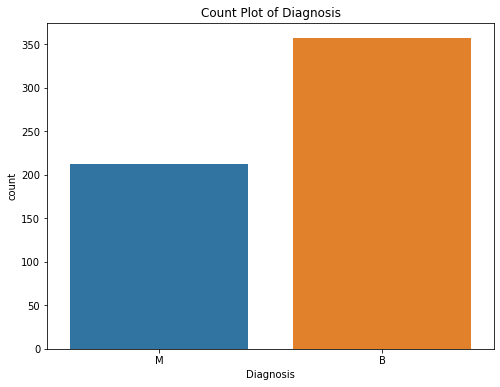

In [7]:
# Data visualization of benign(B) and malignant(M) cases
plt.figure(figsize=(8, 6))
sns.countplot(data['diagnosis'])
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")

In [8]:
# checking for null values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There are no null values in the data.

In [9]:
# Checking data types
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

The diagnosis data type is an "object".

In [10]:
# change "diagnosis" data type
labelencoder_Y = preprocessing.LabelEncoder()
data.iloc[:,1] = labelencoder_Y.fit_transform(data.iloc[:,1].values)

I changed the data type of the "diagnosis" column to an integer. Now, 
benign is (0), and malignant is (1).

In [11]:
data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Correlations

In [12]:
corr_matrix = data.corr()
corr_matrix

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN


In [13]:
# threshold to explore highly correlated features
threshold = 0.75
filter_ = np.abs(corr_matrix['diagnosis']) > threshold
corr_features = corr_matrix.columns[filter_].tolist()
corr_features

['diagnosis',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

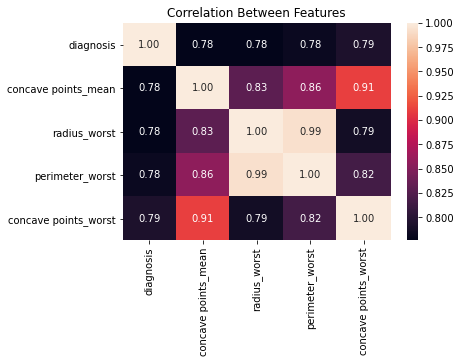

In [14]:
# visualize which features are highly correlated
sns.heatmap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

I used a heatmap to explore highly correlated features and set a threshold = 0.75 to find the features that were the most correlated. I did this to understand if there were correlated features that would need to be addressed later on using PCA.

### Create the Models

To accurately classify the breast tumors, I used the KNN classifier and the Naive Bayes classifier. For the KNN classifier, I used grid search and for both models, I used PCA for model improvement. My goal for both models was to reduce the number of false negatives by finding the best parameters. I am doing this because not accurately classifying a patient with cancer could lead to death or impact life expectancy. It is more critical to flag someone as having cancer who does not have it than missing someone who does have cancer. Therefore, I am focusing first on the recall score and second the F1 score because the F1 score balances the weighting of both precision and recall.

In [15]:
# splitting the data - features (X), diagnosis (Y)
X = data.iloc[:,2:32]
Y = data.iloc[:,1]

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


### K-Nearest Neighbor Algorithm 

In [16]:
# Grid search

knn = KNeighborsClassifier()
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='recall', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

print(grid_search.best_params_)
recall = grid_search.best_score_ *100
print("Recall for our training dataset with tuning is : {:.2f}%".format(recall))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_neighbors': 1}
Recall for our training dataset with tuning is : 92.46%


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


I used grid search to find the model's optimal parameters, which results in the most 'accurate' predictions. The results showed that using K=1 got the best results with the highest recall score.


In [20]:
# Nearest Neighbor algorithm 
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)

# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n ", cm)

print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,Y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred)))
print('MSE Test: ' + str(mean_squared_error(Y_test,Y_pred)))
print('MSE Train: '+ str(mean_squared_error(Y_train,Y_pred_train)))


Confusion matrix:
  [[87  3]
 [ 4 49]]
Accuracy Score : 0.951048951048951
Precision Score : 0.9423076923076923
Recall Score : 0.9245283018867925
F1 Score : 0.9333333333333333
MSE Test: 0.04895104895104895
MSE Train: 0.0


I am using the nearest neighbor algorithm with the K = 1 because it produced the best recall results.


### K-Nearest Neighbor Algorithm using PCA

In [27]:
# Choosing the number of components with the best recall

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


components = range(1,31)
best_rc = 0
best_c = None
best_p = None
best_f = None
best_ac = None
best_CM = None
best_mse = None
best_mse_t = None


for i in components:
   
    # Apply PCA
    pca = PCA(n_components = i) 
    x_scaled_pca = pca.fit_transform(x_scaled)
    
    # Splitting the dataset into the Training set and Test set
    X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(x_scaled_pca, Y, test_size = 0.25, random_state = 0)


    # Nearest Neighbor algorithm 
    classifier = KNeighborsClassifier(n_neighbors = 1)
    classifier.fit(X_train_pca, Y_train_pca)
    Y_pred_pca= classifier.predict(X_test_pca)
    
    ac_score =  accuracy_score(Y_test_pca,Y_pred_pca)
    p_score = precision_score(Y_test_pca,Y_pred_pca)
    re_score =  recall_score(Y_test_pca,Y_pred_pca)
    f_Score = f1_score(Y_test_pca,Y_pred_pca)
    cm = confusion_matrix(Y_test_pca, Y_pred_pca)
    mse = mean_squared_error(Y_test,Y_pred)
    mset = mean_squared_error(Y_train,Y_pred_train)

    
    if re_score > best_rc:
        best_rc = re_score
        best_c = i
        best_p = p_score
        best_f = f_Score
        best_ac = ac_score
        best_CM = cm
        best_mse = mse
        best_mse_t = mset
    
        
                    
#     print(f'Recall score is with {i} components and the score is:  {best_rc}') 
#     print(mse)
#     print(mset)
print(f'Confusion matrix: \n {cm}')       
print(f'The best recall score is with {best_c} components and the score is:  {best_rc}')
print(f'Accuracy score: {best_ac}')
print(f'Precision score: {best_p}')
print(f'Recall score: {best_rc}')
print(f'f1 score: {best_f}')
print(f'MSE Test: {best_mse}')
print(f'MSE Train: {best_mse_t}')


Confusion matrix: 
 [[86  4]
 [ 4 49]]
The best recall score is with 4 components and the score is:  0.9622641509433962
Accuracy score: 0.9440559440559441
Precision score: 0.8947368421052632
Recall score: 0.9622641509433962
f1 score: 0.9272727272727272
MSE Test: 0.04895104895104895
MSE Train: 0.0


To further increase the recall and F1 score and address the multicollinearity, I used PCA with the KNN classifier and found that PCA with four components got the best results.

### Naïve Bayes Algorithm

Next, I used the same train and test set to classify the data for the Naive Bayes classifier. I then used PCA with the Naive Bayes classifier to improve the model and address multicollinearity. Again, I found the best recall score using one component

In [34]:
# Naïve Bayes Algorithm
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)


# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n ", cm)

print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred)))
print('Precision Score : ' + str(precision_score(Y_test,Y_pred)))
print('Recall Score : ' + str(recall_score(Y_test,Y_pred)))
print('F1 Score : ' + str(f1_score(Y_test,Y_pred)))
print('MSE Test: ' + str(mean_squared_error(Y_test,Y_pred)))
print('MSE Train: '+ str(mean_squared_error(Y_train,Y_pred_train)))

Confusion matrix:
  [[84  6]
 [ 6 47]]
Accuracy Score : 0.916083916083916
Precision Score : 0.8867924528301887
Recall Score : 0.8867924528301887
F1 Score : 0.8867924528301887
MSE Test: 0.08391608391608392
MSE Train: 0.0


### Naïve Bayes Algorithm with PCA

In [46]:
# Choosing the number of components

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


components = range(1,31)
best_rc = 0
best_c = None
best_p = None
best_f = None
best_ac = None
best_CM = None
best_mse = None
best_mse_t = None

for i in components:
   
    # Apply PCA
    pca = PCA(n_components = i) 
    x_scaled_pca = pca.fit_transform(x_scaled)
    
    # Splitting the dataset into the Training set and Test set
    X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(x_scaled_pca, Y, test_size = 0.25, random_state = 0)


    # Naïve Bayes Algorithm
    classifier = GaussianNB()
    classifier.fit(X_train_pca, Y_train_pca)
    Y_pred_pca= classifier.predict(X_test_pca)
    
    ac_score =  accuracy_score(Y_test_pca,Y_pred_pca)
    p_score = precision_score(Y_test_pca,Y_pred_pca)
    re_score =  recall_score(Y_test_pca,Y_pred_pca)
    f_Score = f1_score(Y_test_pca,Y_pred_pca)
    cm = confusion_matrix(Y_test_pca, Y_pred_pca)
    mse = mean_squared_error(Y_test,Y_pred)
    mset = mean_squared_error(Y_train,Y_pred_train)

    
    if re_score > best_rc:
        best_rc = re_score
        best_c = i
        best_p = p_score
        best_f = f_Score
        best_ac = ac_score
        best_CM = cm
        best_mse = mse
        best_mse_t = mset
                    
    #print(f'Accuracy score is with {i} components and the score is:  {best_ac}')   
        
print(f'The best recall score is with {best_c} components and the score is:  {best_rc}')
print(f'Accuracy score: {best_ac}')
print(f'Precision score: {best_p}')
print(f'Recall score: {best_rc}')
print(f'f1 score: {best_f}')
print(f'Confusion matrix: \n {cm}')
print(f'MSE Test: {best_mse}')
print(f'MSE Train: {best_mse_t}')



The best recall score is with 1 components and the score is:  0.8867924528301887
Accuracy score: 0.9090909090909091
Precision score: 0.8703703703703703
Recall score: 0.8867924528301887
f1 score: 0.8785046728971964
Confusion matrix: 
 [[84  6]
 [16 37]]
MSE Test: 0.08391608391608392
MSE Train: 0.0


To test for overfitting, I compared the mean square error (MSE) for the test data vs the training data. I found in all models that the MSE for the training error was zero indicating overfitting. However, I did not change model parameters to address overfitting because I got optimal results from the test data with a high recall, F1 and accuracy scores and a low MSE score.

## Results


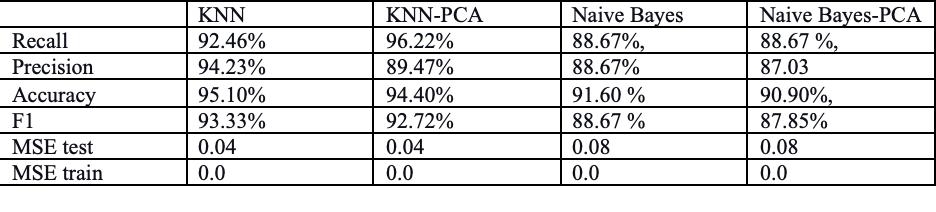


KNN using PCA had the best recall score, which means it has the least number of people being falsely diagnosed as benign or slipping through the cracks of the medical system. However, KNN, without the use of PCA has the best F1 score and a high but slightly lower recall. This means more people are not diagnosed with cancer when they should have been. However, it may be better from a business standpoint because it has a better balance of false negatives and false positives, as represented by the F1 score. Moreover, KNN without PCA has a higher precision score. Therefore, fewer people are being falsely diagnosed as having cancer, which means less tests are being done and less money is being spent. Therefore, KNN without using PCA is the best model from a business lens.

Interestingly, the Naive Bayes algorithm had the lowest scores overall compared to the KNN scores. The KNN algorithm significantly outperformed the Naive Bayes algorithm.

## Conclusion

To address the business question on how to use machine learning to best predict breast cancer and therefore reduce healthcare costs, the best model balances both false negative and false positive scores as represented by F1 score. Therefore, KNN without using PCA is the best model because it has the second highest recall and the best F1 score, therefore, it accurately diagnoses the greatest number of people while also reducing unnecessary healthcare costs.